# VisTool Package Example and Usage

This Jupyter Notebook demonstrates how to use the `analysis_package` for downloading data, combining datasets, cleaning and wrangling data, and visualizing results. Each module in the `analysis_package` provides specific functionalities to streamline data analysis workflows.

## Download Module

The `download` module helps retrieve files from the web and load CSV data into Pandas DataFrames for analysis.

### Features
1. **Download a File**: Retrieve a file from a URL and save it to a specified local path.
2. **Download a CSV File**: Load a CSV file directly from a URL into a Pandas DataFrame.

### Example Usage
- Download and save files locally for future use.
- Load remote CSV files into Pandas DataFrames for immediate analysis.

---

## Combine Module

The `combine` module provides functionality to merge or concatenate datasets.

### Features
1. **Merge Datasets**: Combine two datasets based on a common column with options for join types (`inner`, `outer`, etc.).
2. **Concatenate Datasets**: Append multiple datasets along rows or columns.

### Example Usage
- Merge datasets containing complementary information on a shared key.
- Concatenate multiple datasets into a single cohesive DataFrame.

---

## Wrangle Module

The `wrangle` module supports data cleaning, filtering, and column renaming to prepare datasets for analysis.

### Features
1. **Clean Data**: Handle missing values by filling them with means, removing rows/columns, or keeping them unchanged.
2. **Filter Data**: Filter rows based on user-defined conditions.
3. **Rename Columns**: Rename dataset columns for clarity or standardization.

### Example Usage
- Handle NaN values in datasets by dropping or imputing them.
- Filter datasets based on numeric or categorical conditions.
- Rename columns to improve readability and consistency.

---

## Visualize Module

The `visualize` module facilitates data visualization using Matplotlib and Seaborn.

### Features
1. **Plot Histograms**: Visualize the distribution of a single column.
2. **Plot Scatter Plots**: Explore relationships between two columns.
3. **Plot Correlation Matrix**: Display correlations among numeric features in a heatmap.
4. **Line or Bar Charts**: Display data in your chosen graph type.
5. **Plot Overlays**: Display multiple data plots over one another.

### Example Usage
- Create histograms to understand the data distribution.
- Generate scatter plots to identify trends and correlations.
- Visualize feature correlations to guide feature selection.
- Create different plot types to help see your data.

---

## Prerequisites
Before using this notebook, ensure the following:
1. The `analysis_package` is correctly installed in your Python environment.

## Structure
Each module is demonstrated with relevant examples, including step-by-step code and explanations, making it easy to adapt for your own analysis. In this notebook, the dataset of NHS A&E Departments has been used, sourced from [NHS England's A&E Waiting Times and Activity](https://www.england.nhs.uk/statistics/statistical-work-areas/ae-waiting-times-and-activity/).

Checking the version of package

In [1]:
# this should work!
import analysis_package
print(analysis_package.__version__)
print(analysis_package.__name__)
print(analysis_package.__author__)

0.1.0
analysis_package
Guled Abdullahi and Kayleigh Haydock 


Imports to be ran

In [3]:
# Imports to run before running individual codeblocks below
import os
import pandas as pd
import matplotlib.pyplot as plt

Download Module

In [2]:
# Import the download functions
from analysis_package.download import download_file, download_csv

# Example 1: Download a file and save it locally
url = "https://people.sc.fsu.edu/~jburkardt/data/csv/airtravel.csv"
save_path = "data/airtravel.csv"

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Download the file
download_file(url, save_path)

# Verify the file is saved
if os.path.exists(save_path):
    print(f"File downloaded successfully and saved to: {save_path}")
else:
    print("Failed to download the file.")

# Example 2: Download a CSV file and load into Pandas DataFrame
url = "https://people.sc.fsu.edu/~jburkardt/data/csv/airtravel.csv"
df = download_csv(url)

# Display the first few rows of the DataFrame
print("Downloaded CSV Data:")
print(df.head())


File downloaded successfully: data/airtravel.csv
File downloaded successfully and saved to: data/airtravel.csv
CSV downloaded and loaded into a DataFrame successfully.
Downloaded CSV Data:
  Month   "1958"   "1959"   "1960"
0   JAN      340      360      417
1   FEB      318      342      391
2   MAR      362      406      419
3   APR      348      396      461
4   MAY      363      420      472


Download Module usage

Combine Module

In [ ]:
# Import combine module functions
from analysis_package.combine import merge_datasets, concat_datasets

# Example 1: Merge Datasets
data1 = pd.DataFrame({"id": [1, 2, 3], "value1": [10, 20, 30]})
data2 = pd.DataFrame({"id": [2, 3, 4], "value2": [40, 50, 60]})

merged_data = merge_datasets(data1, data2, on="id", how="inner")
print("Merged Data:")
print(merged_data)

# Example 2: Concatenate Datasets
data3 = pd.DataFrame({"A": [1, 2]})
data4 = pd.DataFrame({"B": [3, 4]})

concatenated_data = concat_datasets([data3, data4], axis=1)
print("Concatenated Data:")
print(concatenated_data)

Wrangle Module

In [7]:
# Import wrangle module functions
from analysis_package.wrangle import clean_data, filter_data, rename_columns


#data = pd.DataFrame({
#    "A": [1, None, 3, None, 5],
#    "B": [4, 5, None, 7, None],
#    "C": [10, 20, 30, None, None]
#}) 

# Example 1: Cleaning Data & Handling of NaN Values
data = pd.read_csv('../analysis_package/data/Monthly_AE_Attendances_Nov_2024.csv')

print("Original Data Top 20 Rows:")
print(data.head(20))

# Ask the user how they want to handle NaN values
print("\nHow would you like to handle NaN values?")
print("1. Remove rows or columns with NaN values.")
print("2. Fill NaN values with the column mean.")
print("3. Fill NaN values with the row mean.")
print("4. Do nothing (keep NaN values).")

choice = input("Enter your choice (1/2/3/4): ")

# Choice 1: Remove rows or columns with NaN values
if choice == "1":
    # Ask whether the user wants to remove rows or columns
    remove_choice = input("Would you like to remove rows or columns with NaN values? (Enter 'rows' or 'columns'): ").strip().lower()

    if remove_choice == "rows":
        # Ask if the user wants to remove all rows or specific rows by index
        rows_choice = input("Would you like to remove all rows or a specific row? (Enter 'all' or 'specific'): ").strip().lower()

        if rows_choice == "all":
            # Remove all rows with NaN values
            cleaned_data = data.dropna(axis=0)
            print("\nCleaned Data (all rows with NaN values removed):")
            print(cleaned_data.head(20))
        
        elif rows_choice == "specific":
            # Ask the user to specify the row indices to remove
            try:
                rows_to_remove = input("Enter row indices to remove (comma-separated): ").split(",")
                rows_to_remove = [int(row.strip()) for row in rows_to_remove]
                cleaned_data = data.drop(rows_to_remove)
                print("\nCleaned Data (specified rows removed):")
                print(cleaned_data.head(20))
            except ValueError:
                print("Invalid input. Please enter valid row indices (e.g., 0, 1, 2).")
        else:
            print("Invalid choice. No rows removed.")

    elif remove_choice == "columns":
        # Ask if the user wants to remove all columns or specific columns
        columns_choice = input("Would you like to remove all columns or a specific column? (Enter 'all' or 'specific'): ").strip().lower()

        if columns_choice == "all":
            # Remove all columns with NaN values
            cleaned_data = data.dropna(axis=1)
            print("\nCleaned Data (all columns with NaN values removed):")
            print(cleaned_data.head(20))
        
        elif columns_choice == "specific":
            # Ask the user to specify the columns to remove
            columns_to_remove = input("Enter column names to remove (comma-separated): ").split(",")
            columns_to_remove = [col.strip() for col in columns_to_remove]
            cleaned_data = data.drop(columns=columns_to_remove)
            print("\nCleaned Data (specified columns removed):")
            print(cleaned_data.head(20))
        else:
            print("Invalid choice. No columns removed.")
       
    else:
        print("Invalid choice. No rows or columns removed.")

# Choice 2: Fill NaN values with the column mean
elif choice == "2":
    specific_columns = input(
        "Enter column names to fill NaN with mean (comma-separated, or leave empty for all numeric columns): "
    ).split(",")
    specific_columns = [col.strip() for col in specific_columns if col.strip()]

    if specific_columns:
        # Fill NaN only in specified columns
        for col in specific_columns:
            if col in data.columns:
                data[col] = data[col].fillna(data[col].mean())
                print(f"Filled NaN values in column '{col}' with its mean.")
            else:
                print(f"Warning: Column '{col}' does not exist in the dataset.")
    else:
        # Fill NaN in all numeric columns
        data = data.fillna(data.mean(numeric_only=True))
        print("Filled NaN values in all numeric columns with their mean.")

    print("\nCleaned Data (NaN values filled with column mean):")
    # Format each column with floating-point numbers to two decimal places
    data = data.round(2)
    print(data)

# Choice 3: Fill NaN values with the row mean
elif choice == "3":
    # Automatically apply to rows, no need for further user input
    cleaned_data = clean_data(data, fill_with="mean", apply_to="rows")
    print("\nCleaned Data (NaN values filled with row mean):")
    print(cleaned_data.round(2))

# Choice 4: Do nothing (keep NaN values)
elif choice == "4":
    print("\nNo cleaning applied. Data remains unchanged:")
    print(data.head(20))

else:
    print("\nInvalid choice. No cleaning applied.")
    
    
# Example 2: Filtering the Data
# Convert the first four columns to strings and the rest to integers (or numeric types)
for i, col in enumerate(data.columns):
    if i < 4:  # First four columns
        data[col] = data[col].astype(str)
        #print(f"Column '{col}' converted to string.")
    else:  # Remaining columns
        data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert to numeric
        #print(f"Column '{col}' converted to numeric.")

# Prompt user for a condition
condition = input("Enter a condition to filter the data (e.g., 'other_emergency_admissions > 100'): ")

# Apply the filter
try:
    filtered_data = filter_data(data, condition)
    print("\nFiltered Data (20):")
    print(filtered_data.head(20))
except Exception as e:
    print(f"An error occurred while filtering data: {e}")

Original Data Top 20 Rows:
                  period org_code                             parent_org  \
0   MSitAE-NOVEMBER-2024      NL7                  NHS ENGLAND MIDLANDS    
1   MSitAE-NOVEMBER-2024      RWY  NHS ENGLAND NORTH EAST AND YORKSHIRE    
2   MSitAE-NOVEMBER-2024      AAH                NHS ENGLAND SOUTH WEST    
3   MSitAE-NOVEMBER-2024    AQN04                NHS ENGLAND SOUTH EAST    
4   MSitAE-NOVEMBER-2024   C82038                  NHS ENGLAND MIDLANDS    
5   MSitAE-NOVEMBER-2024   L83087                NHS ENGLAND SOUTH WEST    
6   MSitAE-NOVEMBER-2024    NQT5F                NHS ENGLAND NORTH WEST    
7   MSitAE-NOVEMBER-2024    NQT5H                NHS ENGLAND SOUTH WEST    
8   MSitAE-NOVEMBER-2024      NR3                  NHS ENGLAND MIDLANDS    
9   MSitAE-NOVEMBER-2024    NTV0B                NHS ENGLAND SOUTH EAST    
10  MSitAE-NOVEMBER-2024    NTV0W                NHS ENGLAND SOUTH EAST    
11  MSitAE-NOVEMBER-2024      RAN                     NHS ENG

Visualize Module

Available Columns for plotting: ['period', 'org_code', 'parent_org', 'org_name', 'ae_attendances_type_1', 'ae_attendances_type_2', 'ae_attendances_other_ae_department', 'ae_attendances_booked_appointments_type_1', 'ae_attendances_booked_appointments_type_2', 'ae_attendances_booked_appointments_other_department', 'attendances_over_4hrs_type_1', 'attendances_over_4hrs_type_2', 'attendances_over_4hrs_other_department', 'attendances_over_4hrs_booked_appointments_type_1', 'attendances_over_4hrs_booked_appointments_type_2', 'attendances_over_4hrs_booked_appointments_other_department', 'patients_who_have_waited_4-12_hs_from_dta_to_admission', 'patients_who_have_waited_12+_hrs_from_dta_to_admission', 'emergency_admissions_via_ae-type_1', 'emergency_admissions_via_ae-type_2', 'emergency_admissions_via_ae-other_ae_department', 'other_emergency_admissions']


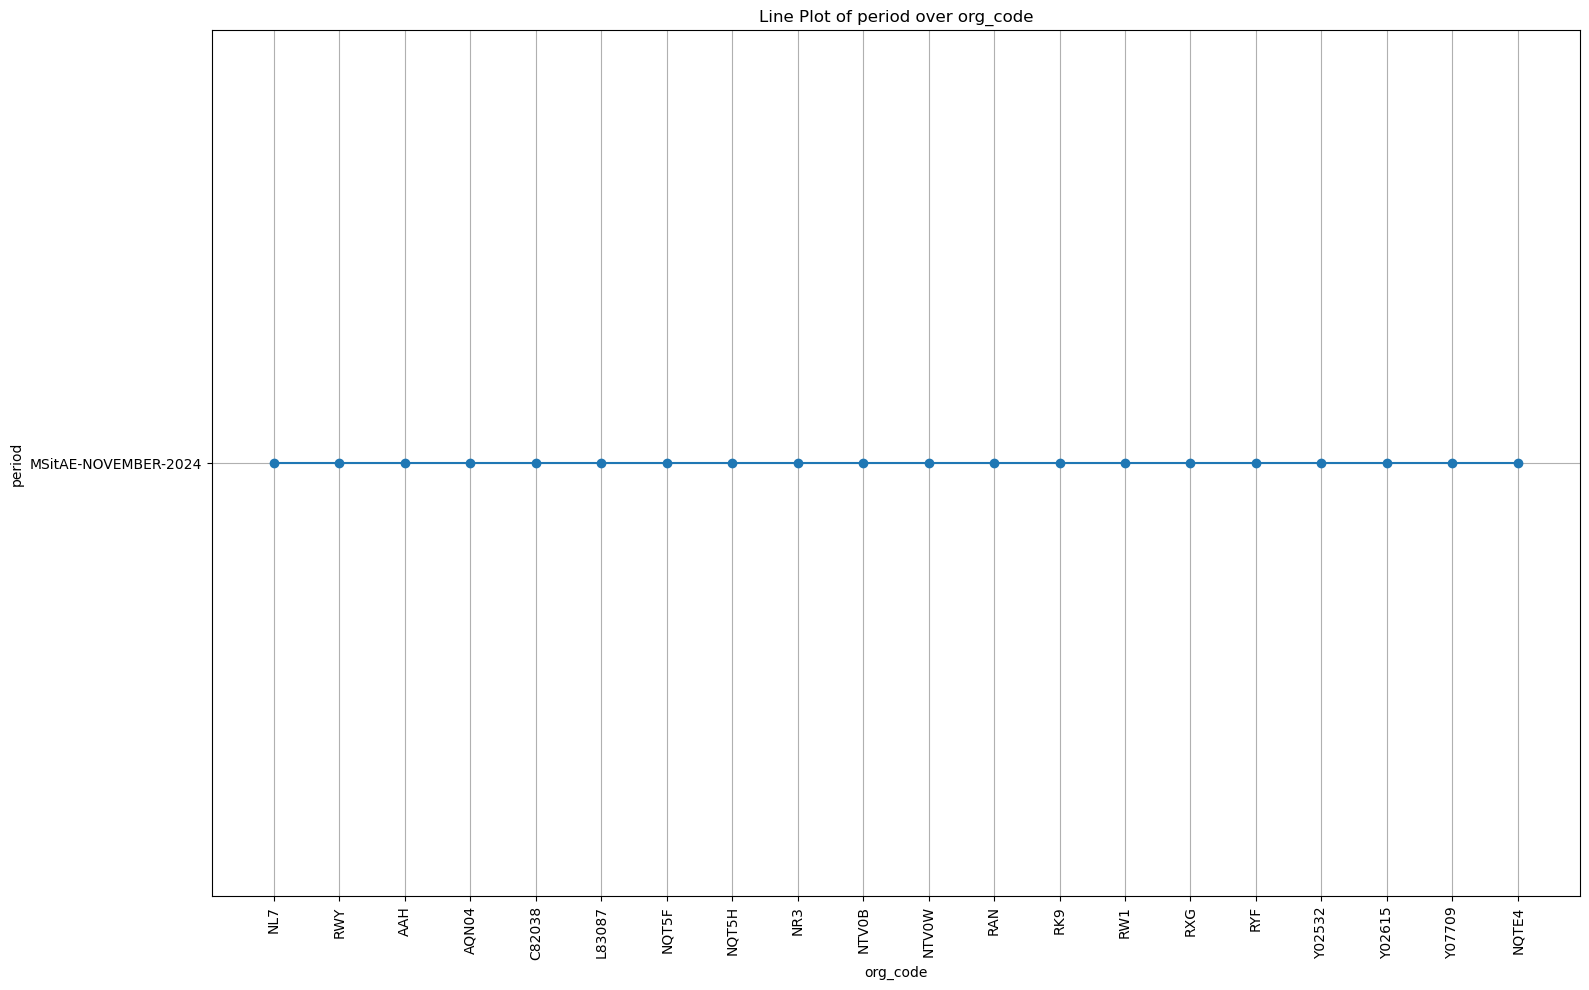

Plot not saved.
Available Columns for Graph Overlaying: ['period', 'org_code', 'parent_org', 'org_name', 'ae_attendances_type_1', 'ae_attendances_type_2', 'ae_attendances_other_ae_department', 'ae_attendances_booked_appointments_type_1', 'ae_attendances_booked_appointments_type_2', 'ae_attendances_booked_appointments_other_department', 'attendances_over_4hrs_type_1', 'attendances_over_4hrs_type_2', 'attendances_over_4hrs_other_department', 'attendances_over_4hrs_booked_appointments_type_1', 'attendances_over_4hrs_booked_appointments_type_2', 'attendances_over_4hrs_booked_appointments_other_department', 'patients_who_have_waited_4-12_hs_from_dta_to_admission', 'patients_who_have_waited_12+_hrs_from_dta_to_admission', 'emergency_admissions_via_ae-type_1', 'emergency_admissions_via_ae-type_2', 'emergency_admissions_via_ae-other_ae_department', 'other_emergency_admissions']


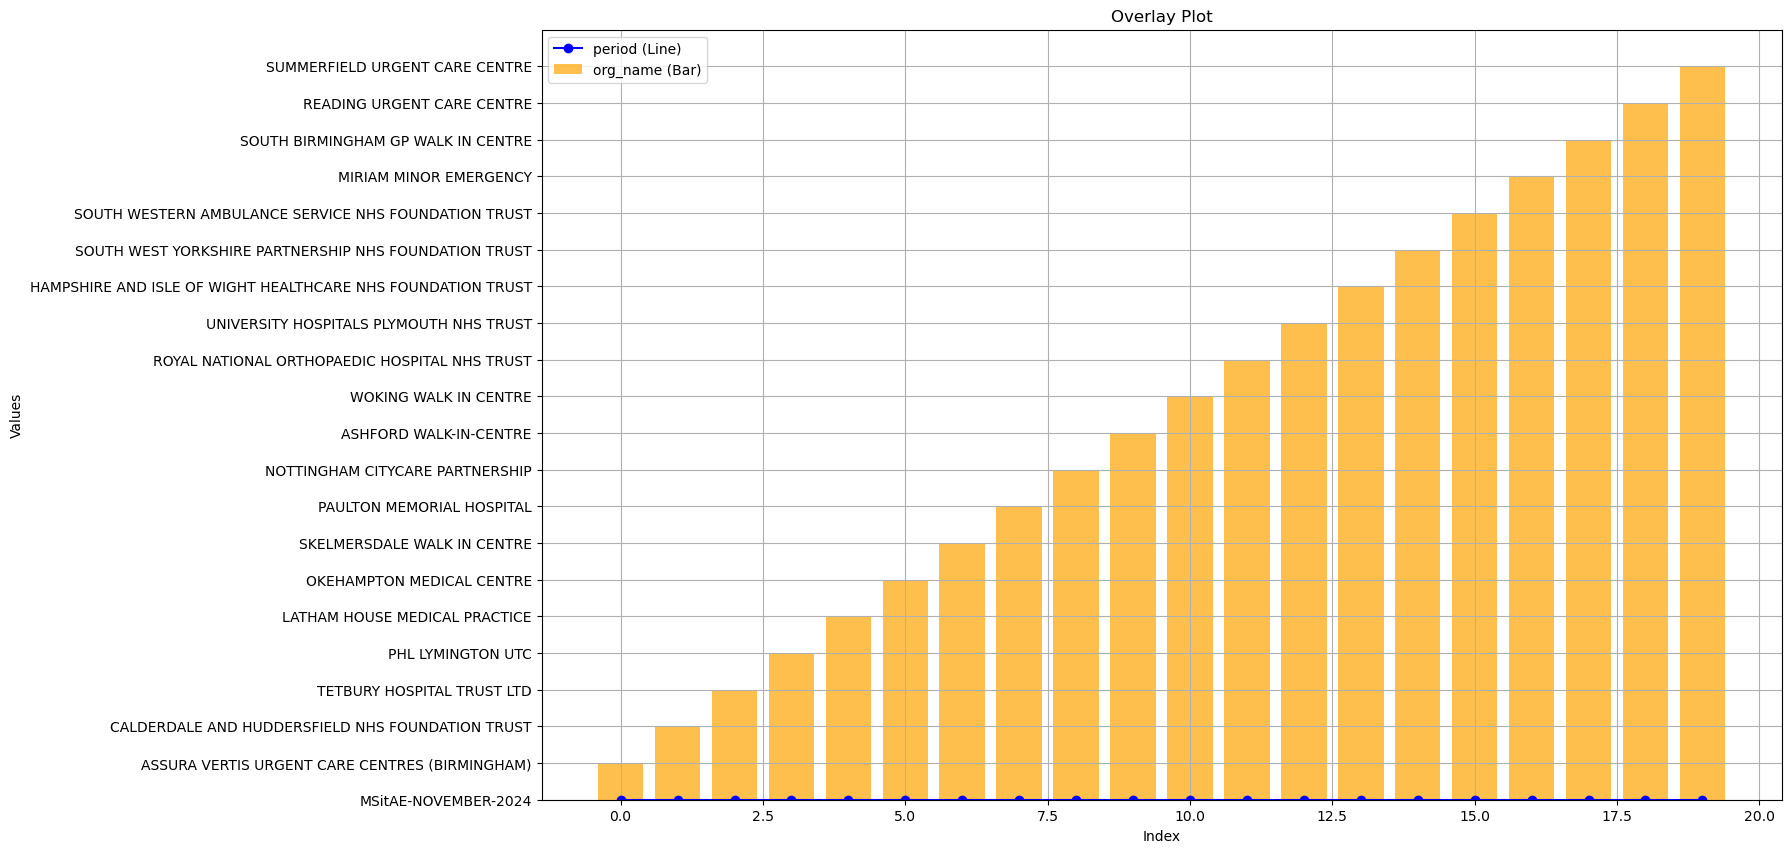

Plot not saved.


In [8]:
# Import functions

from analysis_package.visualize import (
    plot_histogram,
    plot_scatter,
    plot_correlation_matrix,
    plot_line,
    plot_overlay
)


#data = pd.DataFrame({
#    "A": [1, None, 3, 6, 10], 
#    "B": [4, 5, None, 1, 4], 
#    "C": [2, 3, 4, 5, 6]
#})

# Example Data
data = pd.read_csv('../analysis_package/data/Monthly_AE_Attendances_Nov_2024.csv')

data.columns = [col.lower() for col in data.columns]

# For demonstration purposes, due to the dataset having nearly 200 rows
data = data.head(20)

# Example 1: Plotting different graph types
# Display available columns
print("Available Columns for plotting:", list(data.columns))
graph_type = input("Choose graph type (histogram/scatter/correlation/line): ").strip().lower()

# Choice 1: Histogram
if graph_type == "histogram":
    column = input("Enter column name for the histogram: ").strip().lower()
    if column not in data.columns:
        print(f"Error: {column} is not a valid column.")
    else:
        # Plot the histogram
        plot_histogram(data, column)
        
        # Ask user if they want to save the plot
        save_option = input("Would you like to save the plot? (yes/no): ").strip().lower()
        if save_option == "yes":
            save_path = input("Enter file path to save the plot (e.g., 'histogram.png'): ").strip()
            plot_histogram(data, column, save_path)  # Save the plot without re-plotting
            print(f"Plot saved to {save_path}")
        else:
            print("Plot not saved.")

# Choice 2: Scatter
elif graph_type == "scatter":
    x_column = input("Enter X-axis column: ").strip().lower()
    y_column = input("Enter Y-axis column: ").strip().lower()
    
    # Check if the columns exist
    if x_column not in data.columns and y_column not in data.columns:
        print(f"Error: Both '{x_column}' and '{y_column}' are not valid columns.")
    elif x_column not in data.columns:
        print(f"Error: '{x_column}' is not a valid X-axis column.")
    elif y_column not in data.columns:
        print(f"Error: '{y_column}' is not a valid Y-axis column.")
    else:
        # Plot the scatter plot
        plot_scatter(data, x_column, y_column)
        
        # Ask user if they want to save the plot
        save_option = input("Would you like to save the plot? (yes/no): ").strip().lower()
        if save_option == "yes":
            save_path = input("Enter file path to save the plot (e.g., 'scatter_plot.png'): ").strip()
            plot_scatter(data, x_column, y_column, save_path)  # Save the plot without re-plotting
            print(f"Plot saved to {save_path}")
        else:
            print("Plot not saved.")

# Choice 3: Correlation
elif graph_type == "correlation":
    # Plot the correlation matrix
    plot_correlation_matrix(data)
        
    # Ask user if they want to save the plot
    save_option = input("Would you like to save the plot? (yes/no): ").strip().lower()
    if save_option == "yes":
        save_path = input("Enter file path to save the plot (e.g., 'correlation_matrix.png'): ").strip()
        plot_correlation_matrix(data, save_path)  # Save the plot without re-plotting
        print(f"Plot saved to {save_path}")
    else:
        print("Plot not saved.")

# Choice 4: Line
elif graph_type == "line":
    x_column = input("Enter X-axis column: ").strip().lower()
    y_column = input("Enter Y-axis column: ").strip().lower()
    
     # Check if the columns exist
    if x_column not in data.columns and y_column not in data.columns:
        print(f"Error: Both '{x_column}' and '{y_column}' are not valid columns.")
    elif x_column not in data.columns:
        print(f"Error: '{x_column}' is not a valid X-axis column.")
    elif y_column not in data.columns:
        print(f"Error: '{y_column}' is not a valid Y-axis column.")
    else:
        plot_line(data, x_column, y_column)
        
        # Ask user if they want to save the plot
        save_option = input("Would you like to save the plot? (yes/no): ").strip().lower()
        if save_option == "yes":
            save_path = input("Enter file path to save the plot (e.g., 'line_chart.png'): ").strip()
            plot_line(data, x_column, y_column, save_path)  # Save the plot without re-plotting
            print(f"Plot saved to {save_path}")
        else:
            print("Plot not saved.")

else:
    print("Invalid graph type. Please choose histogram, scatter, correlation, or line.")
  
# Example 2: Graph Overlay    
print("Available Columns for Graph Overlaying:", list(data.columns))

# Prompt user for overlay details
num_columns = int(input("How many columns would you like to overlay? "))

columns = []
plot_types = []

for i in range(num_columns):
    col = input(f"Enter column {i + 1}: ").strip()
    if col not in data.columns:
        print(f"Error: {col} is not a valid column.")
        continue
    columns.append(col)
    
    plot_type = input(f"Choose plot type for {col} (line/bar): ").strip().lower()
    if plot_type not in ["line", "bar"]:
        print("Invalid plot type. Defaulting to 'line'.")
        plot_type = "line"
    plot_types.append(plot_type)

# Plot overlay
plot_overlay(data, columns, plot_types)

# Ask user if they want to save the plot
save_option = input("Would you like to save the plot? (yes/no): ").strip().lower()
if save_option == "yes":
    save_path = input("Enter file path to save the plot (e.g., 'overlay_plot.png'): ").strip()
    plot_overlay(data, columns, plot_types, save_path=save_path)
else:
    print("Plot not saved.")